<a href="https://colab.research.google.com/github/jeong1suk/Capstone_ElectricCar/blob/beoman/%EC%BB%A4%EC%8A%A4%ED%85%80%EB%8D%B0%EC%9D%B4%ED%84%B0_YOLO_V5_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%mkdir /content/yolov5_mask #폴더 만들기
%cd /content/yolov5_mask/ #폴더 위치 지정

!curl -L "https://public.roboflow.com/ds/eL4QUdkpSR?key=0ikL5WLM1w" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip # roboflow에서 공개된 mask dataset

/content/yolov5_mask
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0    513      0  0:00:01  0:00:01 --:--:--   513
100 18.5M  100 18.5M    0     0  9521k      0  0:00:01  0:00:01 --:--:--  176M
Archive:  roboflow.zip
 extracting: test/images/1288126-10255706714jpg_jpg.rf.ed230c79fdbb1fa0650ff4fd32f620ee.jpg  
 extracting: test/images/shutterstock_1627199179_jpg.rf.350e69105dd1458572a590c3e3ef2538.jpg  
 extracting: test/images/15391513324714o1n0r10n6_jpg.rf.eb6b6b796ad74b0c9d75011d1020f0af.jpg  
 extracting: train/images/1125506397_15801322206131n_jpg.rf.0a60284a71b2d0ed77c002e768b39b00.jpg  
 extracting: test/images/1579924271_jpg.rf.1fea0f43731fbea2876f63135256004f.jpg  
 extracting: train/images/1_R_kFK9pNLfKAuopY_lAaPQ_jpeg.rf.030922effaedbead963acea666441dbd.jpg  
 extracting: test/images/1224331650_g_400-w_g_jpg.rf.483a35a2395bf48e96783587

In [2]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git  #욜로V5 설치

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 12583, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 12583 (delta 76), reused 89 (delta 55), pack-reused 12467
Receiving objects: 100% (12583/12583), 12.81 MiB | 14.55 MiB/s, done.
Resolving deltas: 100% (8670/8670), done.


In [3]:
#%cd /content/yolov5/
#!pip install -r requirements.txt #설정파일 설치

/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.0 MB/s 


In [4]:
# 필수 라이브러리 설치
#!pip install -r /content/yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
%cat /content/yolov5_mask/data.yaml #yaml파일 출력

#nc: 라벨 종류 

train: ../train/images
val: ../valid/images

nc: 2
names: ['mask', 'no-mask']

In [7]:
# 데이터셋 위치 수정
#파일의 위치, 클래스명 알려주는 설정파일이라 경로 수정
import yaml

with open('/content/yolov5_mask/data.yaml', 'r') as f:
  data = yaml.load(f, Loader=yaml.Loader)

print(data)

data['train'] = '/content/yolov5_mask/'
data['test'] = '/content/yolov5_mask/'
data['val'] = '/content/yolov5_mask/'

with open('/content/yolov5_mask/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'nc': 2, 'names': ['mask', 'no-mask']}
{'train': '/content/yolov5_mask/', 'val': '/content/yolov5_mask/', 'nc': 2, 'names': ['mask', 'no-mask'], 'test': '/content/yolov5_mask/'}


In [8]:
%cd /content/yolov5/

# 욜로v5_s로 학습 
!python train.py --img 416 --batch 16 --epochs 50 --data /content/yolov5_mask/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name mask_yolov5s_results

/content/yolov5
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/yolov5_mask/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=mask_yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-143-g63368e7 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, i

In [11]:
# test 이미지 확인
%cd /content/yolov5/

from glob import glob 

img_list = glob('/content/yolov5_mask/test/images/*.jpg') #glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환

print(len(img_list))


/content/yolov5
15


detect: weights=['/content/yolov5/runs/train/mask_yolov5s_results/weights/best.pt'], source=/content/yolov5_mask/test/images/126202-untitled-design-13_jpg.rf.baa3d2e55d469ae5d5d4cd81c4603e1d.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-143-g63368e7 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5_mask/test/images/126202-untitled-design-13_jpg.rf.baa3d2e55d469ae5d5d4cd81c4603e1d.jpg: 256x416 5 masks, 11.4ms
Speed: 0.3ms pre-process, 11.4ms inference, 1.4ms NMS per image at shape (1, 3, 416, 416)
R

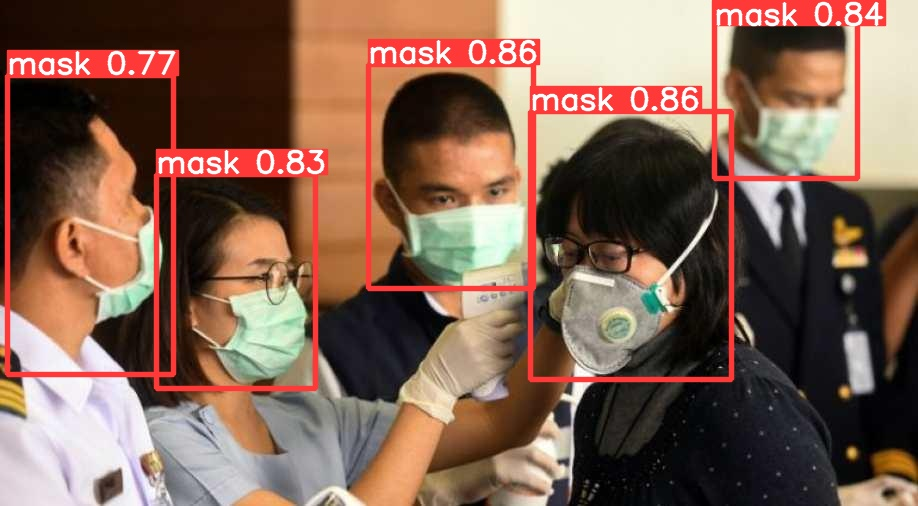

In [20]:
from IPython.display import Image
import os


val_img_path = img_list[7]

weights_path = '/content/yolov5/runs/train/mask_yolov5s_results/weights/best.pt'

!python detect.py --weights "{weights_path}" --img 416 --conf 0.5 --source "{val_img_path}"

detect_img_path = '/content/yolov5/runs/detect/exp10'            # 확인 할려면 exp_num num을 계속 올려줘야함 

Image(os.path.join(detect_img_path, os.path.basename(val_img_path)))

54


detect: weights=['/content/runs/train/mask_yolov5m_results2/weights/best.pt'], source=/content/yolov5_mask/valid/images/S1-EV360_FACEMA_M_20200130144349_jpg.rf.3f0736a586889e3b1ef89733176d8d31.jpg, data=yolov5/data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-143-g63368e7 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 255, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 250, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>